In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import CSV
df = pd.read_csv(r"C:\Users\User\Desktop\Data Science Proyect\Webscraping - Casas en El Salvador\dataset\casas_venta_el_salvador.csv")
df.head()

,localizacion,titulo,descripcion_corta,precio,detalles
0,Nuevo Cuscatlán,"Apartamento en venta en Torre Artea, Nuevo Cu...",Encuentra en Propi +500 casas y apartamentos e...,"\n$295,000","\n,\n121 m,\n,\n3,\n,\n2,\n,\n2"
1,San Salvador,"Apartamento en venta en Puerta Villa Urbana, ...","Agenda visita, oferta y venta en Propi.\nPreci...","\n$210,000","\n,\n73 m,\n,\n2,\n,\n2,\n,\n2"
2,Santa Tecla,"Ubicada en la prestigiosa Colonia Utila, de l...","Ubicada en la prestigiosa Colonia Utila, de la...","\n$699,999","\n,\n550 m,\n,\n4,\n,\n2,\n,\n3"
3,Nuevo Cuscatlán,"RESIDENCIAL CONDADO NORTE, NUEVO CUSCATLAN, C...",¡Bienvenidos a Residencial Condado Norte!\nUbi...,"\n$400,000","\n,\n180 m,\n,\n4,\n,\n3,\n,\n3"
4,San Salvador,Vendo casa residencial la florida Nuevo Cusca...,** Casa Moderna de 3 Niveles con Preciosa Vist...,"\n$570,000","\n,\n1200 m,\n,\n5,\n,\n5,\n,\n6"


In [3]:
df = df.rename(columns={
    'localizacion': 'location',
    'titulo': 'title',
    'descripcion_corta': 'short_description',
    'precio': 'price',
    'detalles': 'details'
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           1060 non-null   object
 1   title              1060 non-null   object
 2   short_description  1059 non-null   object
 3   price              1060 non-null   object
 4   details            1058 non-null   object
dtypes: object(5)
memory usage: 41.5+ KB


In [5]:
#Clean the Data
# Replace unwanted characters in the 'price' column and handle empty values
df['price'] = df['price'].str.replace('[\n$,]', '', regex=True).replace('', '0').astype(float)

In [6]:
#Handle null values in 'short_description' and 'details'
df['short_description'] = df['short_description'].fillna('No description')
df['details'] = df['details'].fillna('')

In [7]:
#Split the 'details' column into separate columns
details = df['details'].str.split(',', expand=True)

In [8]:
# Assign names to the new columns
details.columns = ['na1', 'square_meters', 'na2', 'bedrooms', 'na3', 'parking', 'na4', 'bathroom']

#Remove unnecessary columns
details = details.drop(columns=['na1', 'na2', 'na3', 'na4'])

In [9]:
details

,square_meters,bedrooms,parking,bathroom
0,\n121 m,\n3,\n2,\n2
1,\n73 m,\n2,\n2,\n2
2,\n550 m,\n4,\n2,\n3
3,\n180 m,\n4,\n3,\n3
4,\n1200 m,\n5,\n5,\n6
...,...,...,...,...
1055,\n1300 m,\n5,\nMás,\n6
1056,\n623 m,\n4,\n7,\n5
1057,\n250 m,\n3,\n3,\n3
1058,\n320 m,\n5,\n1,\n2


In [10]:
#Clean whitespace and handle non-numeric values
details = details.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Debugging: Check the values in 'square_meters' before the transformation
print("Valores antes de la limpieza:")
print(details['square_meters'].unique())

Valores antes de la limpieza:
['121 m' '73 m' '550 m' '180 m' '1200 m' '45 m' '142 m' '112 m' '74 m'
 '107 m' '237 m' '174 m' '87 m' '770 m' '274 m' '40 m' '72 m' '35 m'
 '300 m' '620 m' '375 m' '65 m' '234 m' '150 m' '134 m' '400 m' '75 m'
 '50 m' '160 m' '120 m' '1 m' '242 m' '355 m' '325 m' '130 m' '110 m'
 '200 m' '3' '266 m' '257 m' '263 m' '340 m' '502 m' '161 m' '132 m'
 '2286 m' '350 m' '156 m' '467 m' '1348 m' '136 m' '280 m' '135 m' '119 m'
 '446 m' '155 m' '472 m' '260 m' '549 m' '338 m' '320 m' '450 m' '60 m'
 '145 m' '143 m' '362 m' '116 m' '1300 m' '146 m' '608 m' '600 m' '99 m'
 '240 m' '55 m' '117 m' '318 m' '158 m' '198 m' '124 m' '213 m' '210 m'
 '5000 m' '97 m' '140 m' '3750 m' '267 m' '179 m' '82 m' '226 m' '490 m'
 '1191 m' '10 m' '197 m' '101 m' '419 m' '1070 m' '118 m' '137 m' '164 m'
 '376 m' '6800 m' '700 m' '225 m' '100 m' '172 m' '1400 m' '650 m' '524 m'
 '425 m' '250 m' '78 m' '86 m' '190 m' '70 m' '175 m' '181 m' '488 m'
 '3526 m' '3538 m' '292 m' '105 m' '

C:\Users\User\AppData\Local\Temp\ipykernel_15196\3260011920.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  details = details.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [11]:
#Clean whitespace and handle non-numeric values
details = details.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Check the values in 'square_meters' before the transformation
print("Valores antes de la limpieza:")
print(details['square_meters'].unique())

#Handle non-numeric and empty values in 'square_meters'
def clean_square_meters(x):
    if isinstance(x, str):
        x = x.replace(' m', '').strip()  #Remove ' m' and spaces
        if x.isdigit():  # Check if the value is a number
            return int(x)
    return 0  #Return 0 if it is not a valid number

details['square_meters'] = details['square_meters'].apply(clean_square_meters)

#Check the values in 'square_meters' after the transformation
print("Valores después de la limpieza:")
print(details['square_meters'].unique())


Valores antes de la limpieza:
['121 m' '73 m' '550 m' '180 m' '1200 m' '45 m' '142 m' '112 m' '74 m'
 '107 m' '237 m' '174 m' '87 m' '770 m' '274 m' '40 m' '72 m' '35 m'
 '300 m' '620 m' '375 m' '65 m' '234 m' '150 m' '134 m' '400 m' '75 m'
 '50 m' '160 m' '120 m' '1 m' '242 m' '355 m' '325 m' '130 m' '110 m'
 '200 m' '3' '266 m' '257 m' '263 m' '340 m' '502 m' '161 m' '132 m'
 '2286 m' '350 m' '156 m' '467 m' '1348 m' '136 m' '280 m' '135 m' '119 m'
 '446 m' '155 m' '472 m' '260 m' '549 m' '338 m' '320 m' '450 m' '60 m'
 '145 m' '143 m' '362 m' '116 m' '1300 m' '146 m' '608 m' '600 m' '99 m'
 '240 m' '55 m' '117 m' '318 m' '158 m' '198 m' '124 m' '213 m' '210 m'
 '5000 m' '97 m' '140 m' '3750 m' '267 m' '179 m' '82 m' '226 m' '490 m'
 '1191 m' '10 m' '197 m' '101 m' '419 m' '1070 m' '118 m' '137 m' '164 m'
 '376 m' '6800 m' '700 m' '225 m' '100 m' '172 m' '1400 m' '650 m' '524 m'
 '425 m' '250 m' '78 m' '86 m' '190 m' '70 m' '175 m' '181 m' '488 m'
 '3526 m' '3538 m' '292 m' '105 m' '

C:\Users\User\AppData\Local\Temp\ipykernel_15196\1527199236.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  details = details.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [12]:
details

,square_meters,bedrooms,parking,bathroom
0,121,3,2,2
1,73,2,2,2
2,550,4,2,3
3,180,4,3,3
4,1200,5,5,6
...,...,...,...,...
1055,1300,5,Más,6
1056,623,4,7,5
1057,250,3,3,3
1058,320,5,1,2


In [13]:
details['bedrooms'] = details['bedrooms'].str.extract(r'(\d+)').fillna('0').astype(int)
details['parking'] = details['parking'].str.extract(r'(\d+)').fillna('0').astype(int)
details['bathroom'] = details['bathroom'].str.extract(r'(\d+)').fillna('0').astype(int)

In [14]:
#Combine the original DataFrame with the cleaned details
df = pd.concat([df, details], axis=1)

In [15]:
#Remove the original 'details' column
df.drop(columns=['details'], inplace=True)

In [16]:
#Display the cleaned DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           1060 non-null   object 
 1   title              1060 non-null   object 
 2   short_description  1060 non-null   object 
 3   price              1060 non-null   float64
 4   square_meters      1060 non-null   int64  
 5   bedrooms           1060 non-null   int32  
 6   parking            1060 non-null   int32  
 7   bathroom           1060 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 54.0+ KB
None


In [17]:
df

,location,title,short_description,price,square_meters,bedrooms,parking,bathroom
0,Nuevo Cuscatlán,"Apartamento en venta en Torre Artea, Nuevo Cu...",Encuentra en Propi +500 casas y apartamentos e...,295000.0,121,3,2,2
1,San Salvador,"Apartamento en venta en Puerta Villa Urbana, ...","Agenda visita, oferta y venta en Propi.\nPreci...",210000.0,73,2,2,2
2,Santa Tecla,"Ubicada en la prestigiosa Colonia Utila, de l...","Ubicada en la prestigiosa Colonia Utila, de la...",699999.0,550,4,2,3
3,Nuevo Cuscatlán,"RESIDENCIAL CONDADO NORTE, NUEVO CUSCATLAN, C...",¡Bienvenidos a Residencial Condado Norte!\nUbi...,400000.0,180,4,3,3
4,San Salvador,Vendo casa residencial la florida Nuevo Cusca...,** Casa Moderna de 3 Niveles con Preciosa Vist...,570000.0,1200,5,5,6
...,...,...,...,...,...,...,...,...
1055,Antiguo Cuscatlán,PRECIOSA RESIDENCIA EN PORTONES DE MADRESELVA,¡Se Vende! Residencia en Portones de Madreselv...,1980000.0,1300,5,0,6
1056,Antiguo Cuscatlán,¡SE VENDE HERMOSA CASA EN CUMBRES DE CUSCATLAN!,"Se Vende Casa en Cumbres de Cuscatlan.\n1,250 ...",825000.0,623,4,7,5
1057,San Salvador,Se vende casa en escalón parte alta,Se vende casa de 2 niveles parte alta del Esca...,255000.0,250,3,3,3
1058,Chalatenango,Vendo casa en la palma chalatenango,Vendo muy hermosa casa en colonia Cayaguanca l...,180000.0,320,5,1,2


In [18]:
#Format the 'price' column to have commas and no decimals
df['price'] = df['price'].apply(lambda x: f'{x:,.0f}')

In [19]:
#Check for null values in the DataFrame
null_values = df.isnull().sum()
print(null_values)

location             0
title                0
short_description    0
price                0
square_meters        0
bedrooms             0
parking              0
bathroom             0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           1060 non-null   object
 1   title              1060 non-null   object
 2   short_description  1060 non-null   object
 3   price              1060 non-null   object
 4   square_meters      1060 non-null   int64 
 5   bedrooms           1060 non-null   int32 
 6   parking            1060 non-null   int32 
 7   bathroom           1060 non-null   int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 54.0+ KB


In [21]:
#Remove commas and convert the 'price' column to integer type
df['price'] = df['price'].str.replace(',', '').astype(int)

In [22]:
# Convert text columns to lowercase
df['location'] = df['location'].str.lower()
df['title'] = df['title'].str.lower()
df['short_description'] = df['short_description'].str.lower()

In [23]:
#Remove newline characters in 'short_description'
df['short_description'] = df['short_description'].str.replace(r'\n|\*\*', ' ', regex=True)
df['title'] = df['title'].str.replace(r'\n|\*\*', ' ', regex=True)

In [24]:
#Replace 0 values with 1 in the 'bathroom' column
df['bathroom'] = df['bathroom'].replace(0, 1)

In [25]:
#Adjust the index to start from 1
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

In [26]:
df

,location,title,short_description,price,square_meters,bedrooms,parking,bathroom
1,nuevo cuscatlán,"apartamento en venta en torre artea, nuevo cu...",encuentra en propi +500 casas y apartamentos e...,295000,121,3,2,2
2,san salvador,"apartamento en venta en puerta villa urbana, ...","agenda visita, oferta y venta en propi. precio...",210000,73,2,2,2
3,santa tecla,"ubicada en la prestigiosa colonia utila, de l...","ubicada en la prestigiosa colonia utila, de la...",699999,550,4,2,3
4,nuevo cuscatlán,"residencial condado norte, nuevo cuscatlan, c...",¡bienvenidos a residencial condado norte! ubic...,400000,180,4,3,3
5,san salvador,vendo casa residencial la florida nuevo cusca...,casa moderna de 3 niveles con preciosa vista...,570000,1200,5,5,6
...,...,...,...,...,...,...,...,...
1056,antiguo cuscatlán,preciosa residencia en portones de madreselva,¡se vende! residencia en portones de madreselv...,1980000,1300,5,0,6
1057,antiguo cuscatlán,¡se vende hermosa casa en cumbres de cuscatlan!,"se vende casa en cumbres de cuscatlan. 1,250 v...",825000,623,4,7,5
1058,san salvador,se vende casa en escalón parte alta,se vende casa de 2 niveles parte alta del esca...,255000,250,3,3,3
1059,chalatenango,vendo casa en la palma chalatenango,vendo muy hermosa casa en colonia cayaguanca l...,180000,320,5,1,2


In [27]:
#Identify zero values in important columns
zero_price = df[df['price'] == 0]
zero_square_meters = df[df['square_meters'] == 0]
print(f'Number of properties with price 0: {len(zero_price)}')
print(f'Number of properties with square meters 0: {len(zero_square_meters)}')

Number of properties with price 0: 3
Number of properties with square meters 0: 2


In [28]:
#Remove properties with zero values in 'price' or 'square_meters'
df = df[df['price'] > 0]
df = df[df['square_meters'] > 0]

In [29]:
#Calculate descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              price  square_meters     bedrooms      parking     bathroom
count  1.057000e+03   1.057000e+03  1057.000000  1057.000000  1057.000000
mean   4.136065e+05   2.405636e+03     3.410596     2.840114     2.863765
std    4.476258e+05   3.847243e+04     1.499937     2.123992     1.821687
min    1.000000e+00   1.000000e+00     0.000000     0.000000     1.000000
25%    1.500000e+05   1.080000e+02     3.000000     2.000000     2.000000
50%    2.830000e+05   2.040000e+02     3.000000     2.000000     3.000000
75%    4.750000e+05   4.460000e+02     4.000000     3.000000     4.000000
max    5.622435e+06   1.086575e+06    10.000000    20.000000    20.000000


In [30]:
#Display the extreme values of 'square_meters'
print(df['square_meters'].sort_values(ascending=False).head(10))
print(df['square_meters'].sort_values(ascending=True).head(10))

915    1086575
572     540000
455     290640
819      80000
745      55717
409      35000
474      21000
248      18603
467      13978
811      10600
Name: square_meters, dtype: int64
241    1
965    1
227    1
90     1
92     1
642    1
938    1
454    1
100    1
792    1
Name: square_meters, dtype: int64


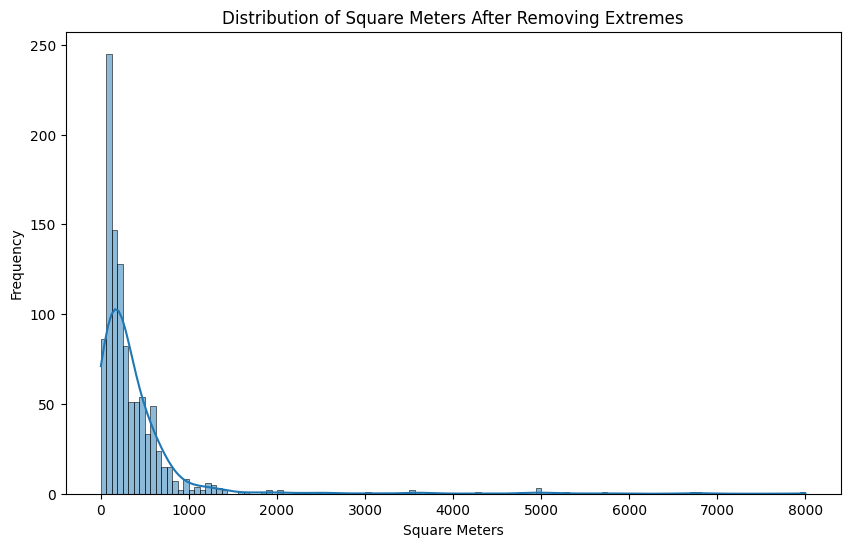

              price  square_meters     bedrooms      parking     bathroom
count  1.047000e+03    1047.000000  1047.000000  1047.000000  1047.000000
mean   4.145345e+05     373.107927     3.410697     2.847182     2.870105
std    4.484442e+05     652.670478     1.502515     2.126845     1.826178
min    1.000000e+00       1.000000     0.000000     0.000000     1.000000
25%    1.500000e+05     107.500000     3.000000     2.000000     2.000000
50%    2.830000e+05     201.000000     3.000000     2.000000     3.000000
75%    4.750000e+05     427.000000     4.000000     3.000000     4.000000
max    5.622435e+06    8000.000000    10.000000    20.000000    20.000000


In [31]:
#Define a reasonable limit for square meters
upper_limit = 10000

#Remove values that exceed the limit
df = df[df['square_meters'] <= upper_limit]

#Visualize the distribution of square meters
plt.figure(figsize=(10, 6))
sns.histplot(df['square_meters'], kde=True)
plt.title('Distribution of Square Meters After Removing Extremes')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

#Review the descriptive statistics
cleaned_stats = df.describe()
print(cleaned_stats)

In [32]:
#Identify extreme values in 'square_meters'
print("Top 10 valores más altos en square_meters:")
print(df['square_meters'].sort_values(ascending=False).head(10))
print("\nTop 10 valores más bajos en square_meters:")
print(df['square_meters'].sort_values(ascending=True).head(10))

Top 10 valores más altos en square_meters:
669    8000
141    6800
890    6710
914    5730
259    5253
112    5000
992    5000
800    4939
976    4800
495    4284
Name: square_meters, dtype: int64

Top 10 valores más bajos en square_meters:
241    1
227    1
90     1
92     1
642    1
454    1
938    1
100    1
792    1
72     1
Name: square_meters, dtype: int64


In [33]:
#Calculate the mean of 'square_meters' in the range of 80 to 120
mean_square_meters = df[(df['square_meters'] >= 80) & (df['square_meters'] <= 120)]['square_meters'].mean()
print(f'Mean square meters in the range 80-120: {mean_square_meters}')

Mean square meters in the range 80-120: 102.67469879518072


C:\Users\User\AppData\Local\Temp\ipykernel_15196\3798570035.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.67469879518072' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['square_meters'] < lower_limit, 'square_meters'] = mean_square_meters


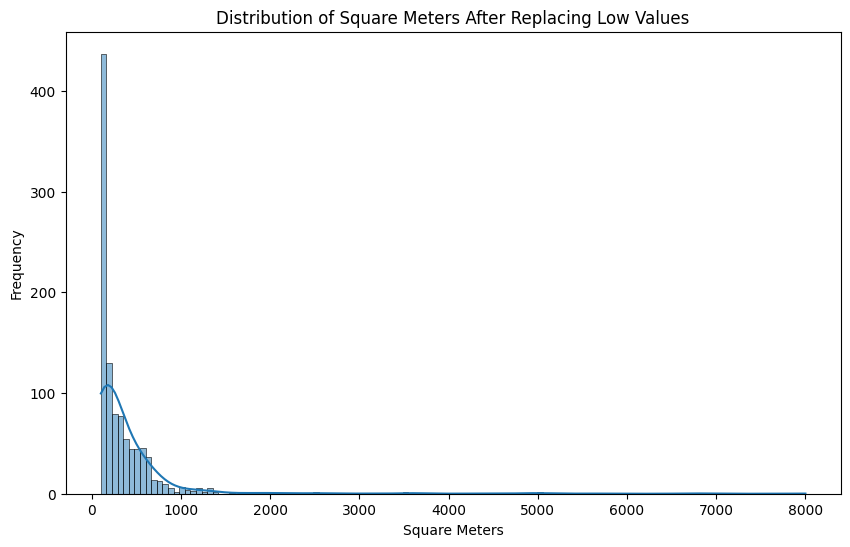

              price  square_meters     bedrooms      parking     bathroom
count  1.047000e+03    1047.000000  1047.000000  1047.000000  1047.000000
mean   4.145345e+05     381.822119     3.410697     2.847182     2.870105
std    4.484442e+05     648.539168     1.502515     2.126845     1.826178
min    1.000000e+00     102.674699     0.000000     0.000000     1.000000
25%    1.500000e+05     107.500000     3.000000     2.000000     2.000000
50%    2.830000e+05     201.000000     3.000000     2.000000     3.000000
75%    4.750000e+05     427.000000     4.000000     3.000000     4.000000
max    5.622435e+06    8000.000000    10.000000    20.000000    20.000000


In [34]:
#Define a lower limit (e.g., less than 10 square meters) and replace with the calculated mean
lower_limit = 102.67
df.loc[df['square_meters'] < lower_limit, 'square_meters'] = mean_square_meters

#Visualize the distribution of square meters again
plt.figure(figsize=(10, 6))
sns.histplot(df['square_meters'], kde=True)
plt.title('Distribution of Square Meters After Replacing Low Values')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

#Review the descriptive statistics
cleaned_stats = df.describe()
print(cleaned_stats)

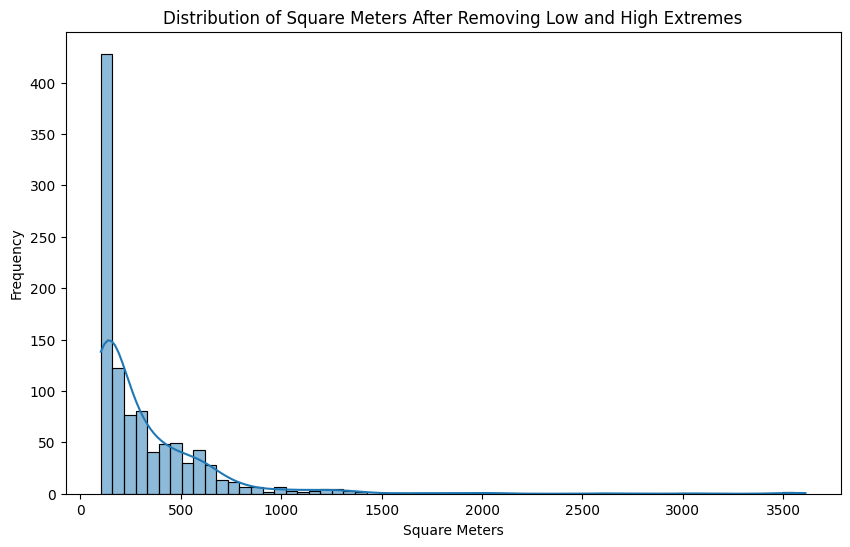

In [35]:
#Establish reasonable upper limits based on percentiles
upper_limit_square_meters = df['square_meters'].quantile(0.99)
upper_limit_bedrooms = df['bedrooms'].quantile(0.99)
upper_limit_parking = df['parking'].quantile(0.99)
upper_limit_bathroom = df['bathroom'].quantile(0.99)

#Filter values that exceed the upper limits
df = df[df['square_meters'] <= upper_limit_square_meters]
df = df[df['bedrooms'] <= upper_limit_bedrooms]
df = df[df['parking'] <= upper_limit_parking]
df = df[df['bathroom'] <= upper_limit_bathroom]

# Visualize the distribution of square meters again
plt.figure(figsize=(10, 6))
sns.histplot(df['square_meters'], kde=True)
plt.title('Distribution of Square Meters After Removing Low and High Extremes')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

In [36]:
cleaned_stats = df.describe()
print(cleaned_stats)

              price  square_meters     bedrooms      parking     bathroom
count  1.027000e+03    1027.000000  1027.000000  1027.000000  1027.000000
mean   4.021745e+05     318.253904     3.365141     2.820837     2.785784
std    4.067649e+05     340.891937     1.415616     2.020614     1.501420
min    1.000000e+00     102.674699     0.000000     0.000000     1.000000
25%    1.500000e+05     107.000000     3.000000     2.000000     2.000000
50%    2.830000e+05     200.000000     3.000000     2.000000     2.000000
75%    4.650000e+05     400.000000     4.000000     3.000000     4.000000
max    3.300000e+06    3610.000000    10.000000    10.000000     8.000000


In [37]:
#Calculate the mean of each column excluding zero values
mean_bedrooms = df[df['bedrooms'] > 0]['bedrooms'].mean()
mean_parking = df[df['parking'] > 0]['parking'].mean()
mean_bathroom = df[df['bathroom'] > 0]['bathroom'].mean()

print(f'Mean bedrooms (excluding zeros): {mean_bedrooms}')
print(f'Mean parking (excluding zeros): {mean_parking}')
print(f'Mean bathroom (excluding zeros): {mean_bathroom}')

Mean bedrooms (excluding zeros): 3.375
Mean parking (excluding zeros): 2.93515704154002
Mean bathroom (excluding zeros): 2.7857838364167478


In [38]:
#Replace zero values with the calculated mean
df.loc[df['bedrooms'] == 0, 'bedrooms'] = mean_bedrooms
df.loc[df['parking'] == 0, 'parking'] = mean_parking
df.loc[df['bathroom'] == 0, 'bathroom'] = mean_bathroom

C:\Users\User\AppData\Local\Temp\ipykernel_15196\1720420210.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.375' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['bedrooms'] == 0, 'bedrooms'] = mean_bedrooms
C:\Users\User\AppData\Local\Temp\ipykernel_15196\1720420210.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.93515704154002' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['parking'] == 0, 'parking'] = mean_parking
C:\Users\User\AppData\Local\Temp\ipykernel_15196\1720420210.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.7857838364167478' has dtype incompatible with int32, please explicitly cast to a compatible dtype fir

In [39]:
cleaned_stats = df.describe()
print(cleaned_stats)

              price  square_meters     bedrooms      parking     bathroom
count  1.027000e+03    1027.000000  1027.000000  1027.000000  1027.000000
mean   4.021745e+05     318.253904     3.375000     2.935157     2.785784
std    4.067649e+05     340.891937     1.403838     1.939095     1.501420
min    1.000000e+00     102.674699     1.000000     1.000000     1.000000
25%    1.500000e+05     107.000000     3.000000     2.000000     2.000000
50%    2.830000e+05     200.000000     3.000000     2.000000     2.000000
75%    4.650000e+05     400.000000     4.000000     3.000000     4.000000
max    3.300000e+06    3610.000000    10.000000    10.000000     8.000000


In [40]:
df_copy = df.copy()

In [41]:
#Establish a reasonable limit for prices (e.g., remove values less than 10,000)
df_copy = df_copy[df_copy['price'] >= 10000]

In [42]:
#Establish an upper limit for prices (e.g., the 99th percentile)
upper_limit_price = df_copy['price'].quantile(0.99)
df_copy = df_copy[df_copy['price'] <= upper_limit_price]

In [43]:
#Establish reasonable upper limits based on percentiles
upper_limit_square_meters = df_copy['square_meters'].quantile(0.99)
upper_limit_bedrooms = df_copy['bedrooms'].quantile(0.99)
upper_limit_parking = df_copy['parking'].quantile(0.99)
upper_limit_bathroom = df_copy['bathroom'].quantile(0.99)

#Filter values that exceed the upper limits
df_copy = df_copy[df_copy['square_meters'] <= upper_limit_square_meters]
df_copy = df_copy[df_copy['bedrooms'] <= upper_limit_bedrooms]
df_copy = df_copy[df_copy['parking'] <= upper_limit_parking]
df_copy = df_copy[df_copy['bathroom'] <= upper_limit_bathroom]

#Review the descriptive statistics again
cleaned_stats = df_copy.describe()
print(cleaned_stats)

              price  square_meters    bedrooms     parking    bathroom
count  9.800000e+02     980.000000  980.000000  980.000000  980.000000
mean   3.741934e+05     283.580342    3.293622    2.866316    2.718367
std    3.422445e+05     228.226209    1.217338    1.856336    1.417197
min    1.100000e+04     102.674699    1.000000    1.000000    1.000000
25%    1.500000e+05     106.000000    3.000000    2.000000    2.000000
50%    2.790000e+05     200.000000    3.000000    2.000000    2.000000
75%    4.500000e+05     391.250000    4.000000    3.000000    4.000000
max    1.980000e+06    1350.000000    8.000000   10.000000    7.000000


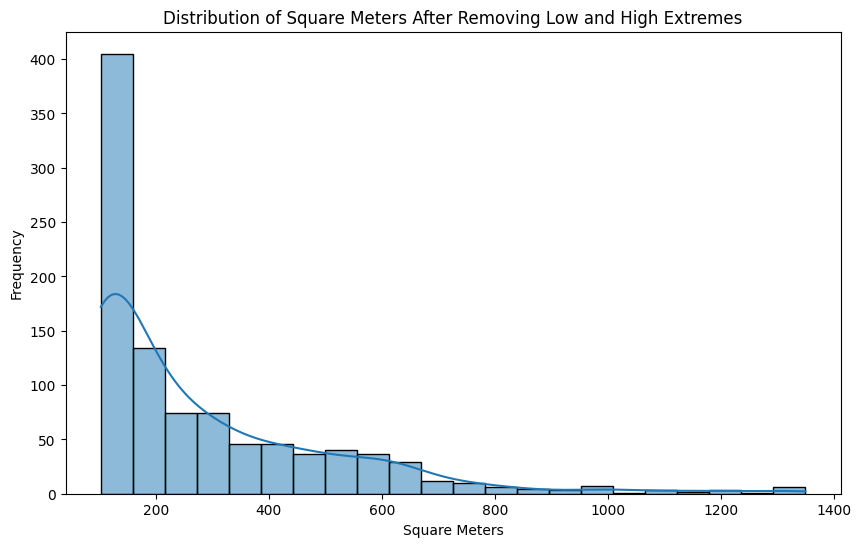

In [45]:
#Visualize the distribution of square meters after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['square_meters'], kde=True)
plt.title('Distribution of Square Meters After Removing Low and High Extremes')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

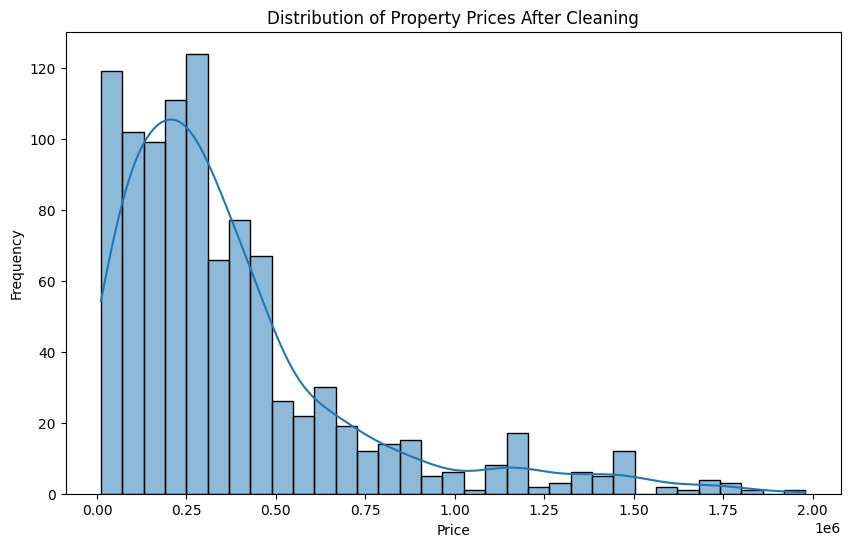

In [46]:
#Visualize the distribution of prices after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['price'], kde=True)
plt.title('Distribution of Property Prices After Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [48]:
df_copy.to_csv('cleaned_data_final.csv', index=False)